In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("crime_data.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data=data.rename({'Unnamed: 0':'StateName'},axis=1)

In [5]:
data

,StateName,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
data.isnull().sum()

StateName    0
Murder       0
Assault      0
UrbanPop     0
Rape         0
dtype: int64

In [7]:
data.dtypes

StateName     object
Murder       float64
Assault        int64
UrbanPop       int64
Rape         float64
dtype: object

In [8]:
data.shape

(50, 5)

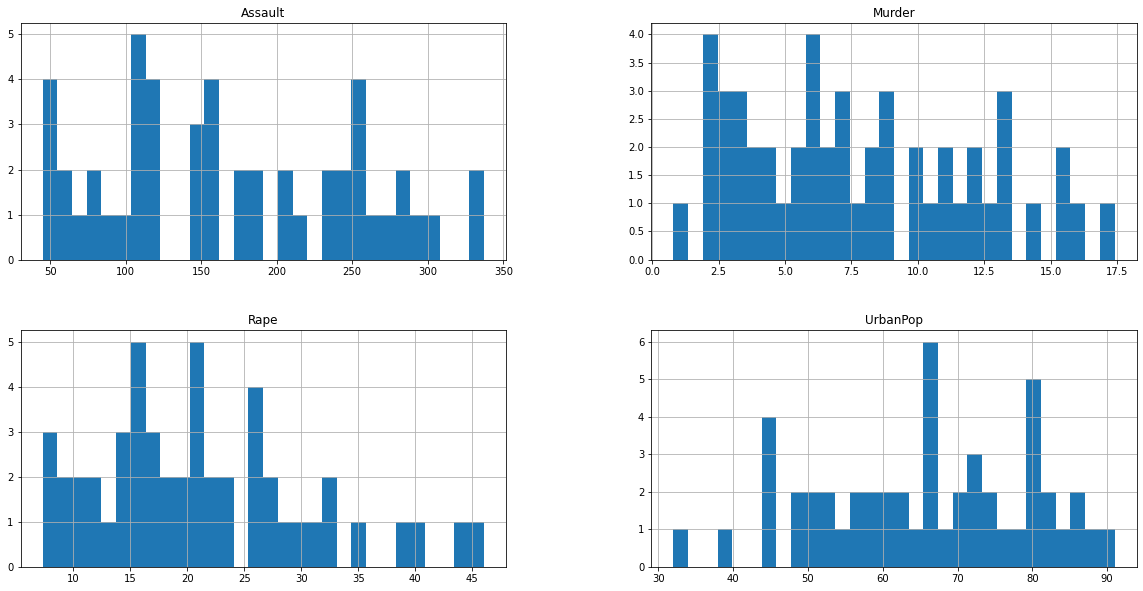

In [9]:
data.hist(bins=30,figsize=(20,10))
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data.iloc[:,1:])

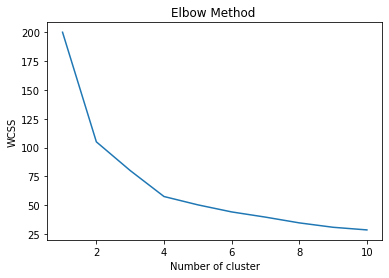

In [11]:
Wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    Wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),Wcss)
plt.title('Elbow Method ')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [12]:
cluster_new=KMeans(4,random_state=42)
cluster_new.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [13]:
data['KCluster']=cluster_new.labels_

In [14]:
data.groupby(['KCluster']).count()

,StateName,Murder,Assault,UrbanPop,Rape
KCluster,,,,,
0,8,8,8,8,8
1,16,16,16,16,16
2,13,13,13,13,13
3,13,13,13,13,13


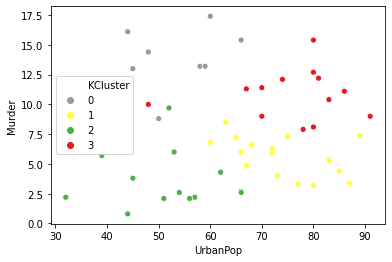

In [15]:
sns.scatterplot(data=data,x='UrbanPop',y='Murder',hue='KCluster',palette='Set1_r')
#data=data,x='Assault',y='Murder',hue='KCluster'

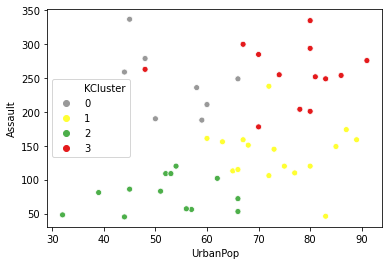

In [16]:
sns.scatterplot(data=data,x='UrbanPop',y='Assault',hue='KCluster',palette='Set1_r')

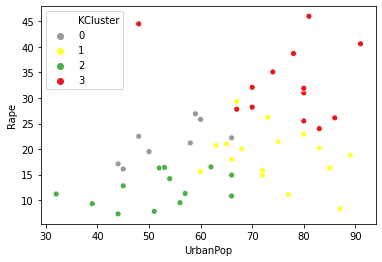

In [17]:
sns.scatterplot(data=data,x='UrbanPop',y='Rape',hue='KCluster',palette='Set1_r')

In [18]:
data.groupby(['KCluster']).mean()

,Murder,Assault,UrbanPop,Rape
KCluster,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,3.600000,78.538462,52.076923,12.176923
3,10.815385,257.384615,76.000000,33.192308


In [ ]:
Conclusion 

cluster 2: The cluster 2 contains low urban population followed by low crime-rate.

cluster 1: Despite of high Urban population, the states have slight increase in crimes in comparision to cluster 2.

cluster 0:This cluster has low urban population, still there are high crime-rates. Also cluster 0 has higest muder-rate. 

cluster 3: This cluster has high urban population followed by high crime-rate.